In [1]:
import pandas as pd
import seaborn as sns
import statistics as st
import matplotlib.pyplot as plt
import numpy as np

df_charts = pd.read_csv("../data/attacks_chart.csv" , sep=",", encoding="Latin-1")




In [2]:
df_charts.drop('Unnamed: 0',axis=1,inplace=True)
df_charts.dtypes
sns.set(style="darkgrid")



### 1. Attacks distribution by countries

In [3]:
pd.set_option('display.max_rows', None)



In [4]:
df_country=df_charts['COUNTRY'].value_counts()[:10]

df_country.dtypes

dtype('int64')

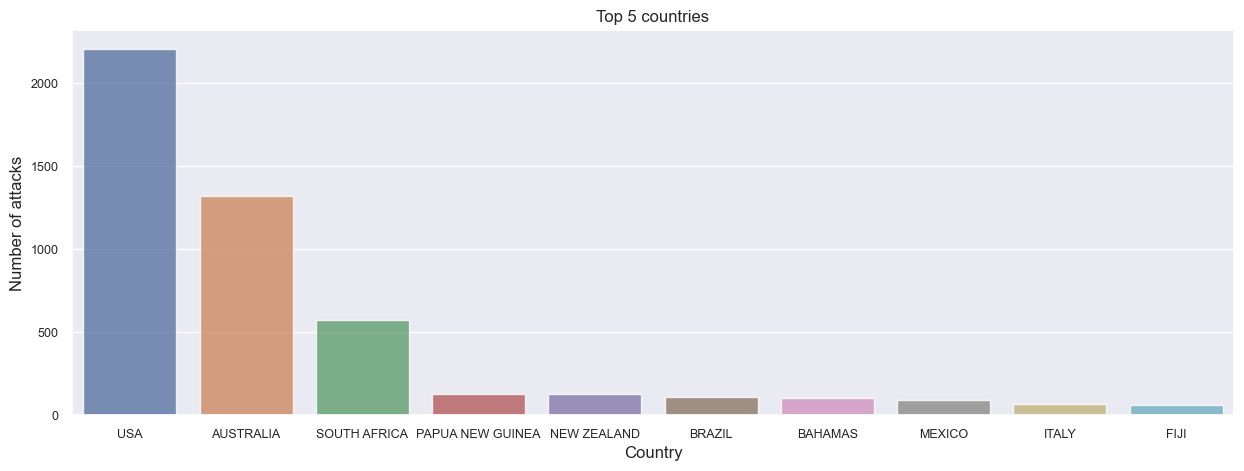

In [5]:

country_count  = df_charts['COUNTRY'].value_counts()
country_count = country_count[:10,]
plt.figure(figsize=(15,5), dpi=100)
sns.barplot(x=country_count.index, y=country_count.values, alpha=0.8,)
plt.title('Top 5 countries')
plt.ylabel('Number of attacks', fontsize=12)
plt.xlabel('Country', fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=9)
plt.savefig('../images/chart1.png', dpi=100)
plt.show()





### 2. Attacks increase fatality depending on Sex

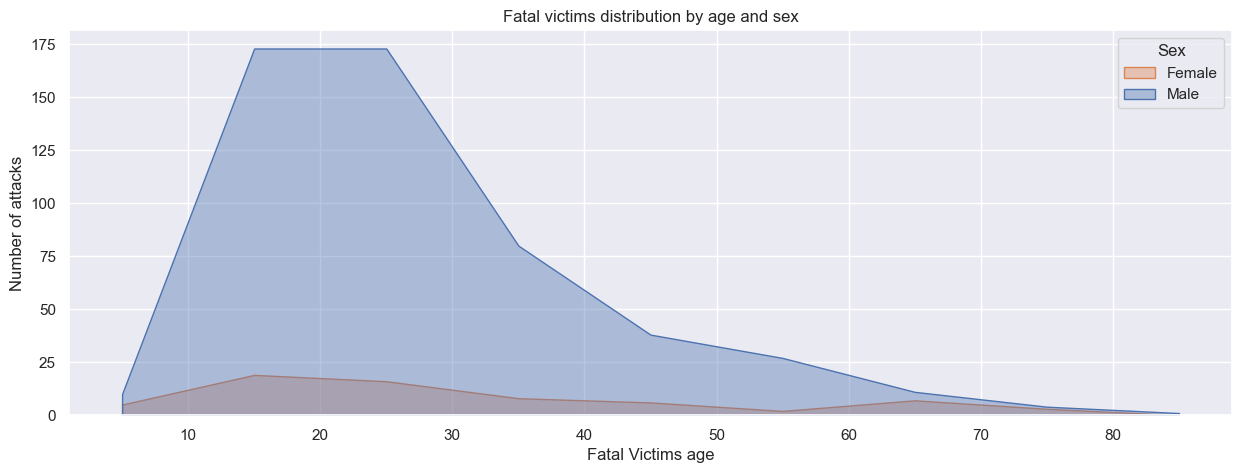

In [6]:

df_age = df_charts[df_charts.AGE > 0]
df_fatal = df_age[df_age.SEX != 'Unknown']
df_fatal  = df_fatal[df_fatal.FATAL == 'Y']
plt.figure(figsize=(15,5), dpi=100)


sns.histplot(x=df_fatal.AGE,hue=df_fatal.SEX, bins=[0,10,20,30,40,50,60,70,80,90],element="poly",alpha=0.4)
plt.title('Fatal victims distribution by age and sex')
plt.ylabel('Number of attacks', fontsize=12)
plt.xlabel('Fatal Victims age', fontsize=12)
plt.legend(labels = ['Female', 'Male'],title ="Sex")
plt.savefig("../images/chart2.png")
plt.show()




In [7]:
df_fatal['TYPE'].value_counts()


Unprovoked    571
Provoked        7
Unknown         5
Name: TYPE, dtype: int64

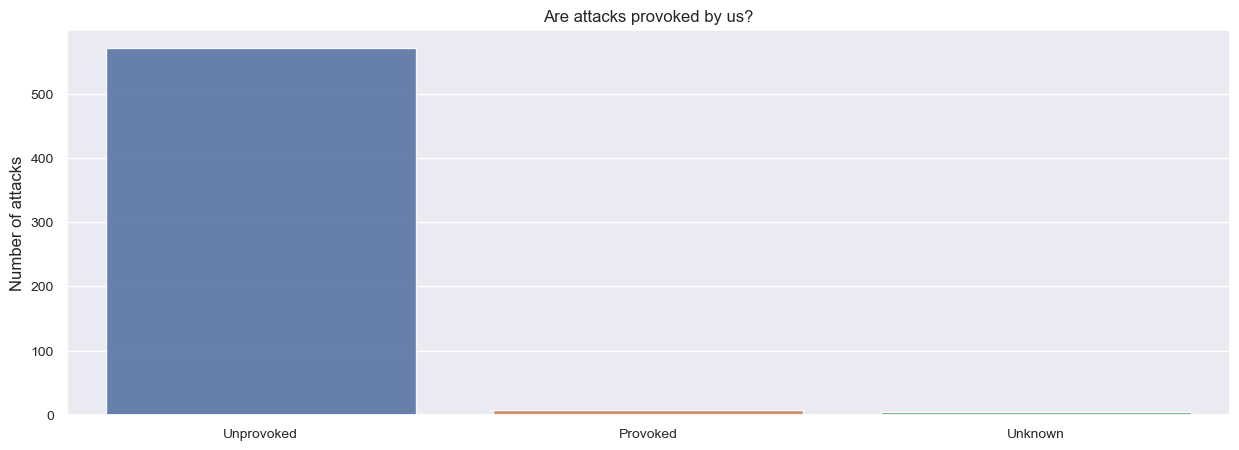

In [8]:
type_count  = df_fatal['TYPE'].value_counts()
type_count = type_count[:5,]
plt.figure(figsize=(15,5), dpi=100)
sns.barplot(x=type_count.index, y=type_count.values,alpha=0.9)
plt.title('Are attacks provoked by us?')
plt.ylabel('Number of attacks', fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.savefig("../images/chart2a.png")
plt.show()



In [9]:
v_total_attacks = len(df_charts)

v_unprovoked = len(df_charts[df_charts["TYPE"]=="Unprovoked"])

print(v_unprovoked/v_total_attacks*100)

#Around 72% of attacks are unprovoked... but I'm wondering about this 9% of provoked attacks....


81.89040207522697


### 3. Show attacks evolution by year (less/more sharks?, less/more agressive?)


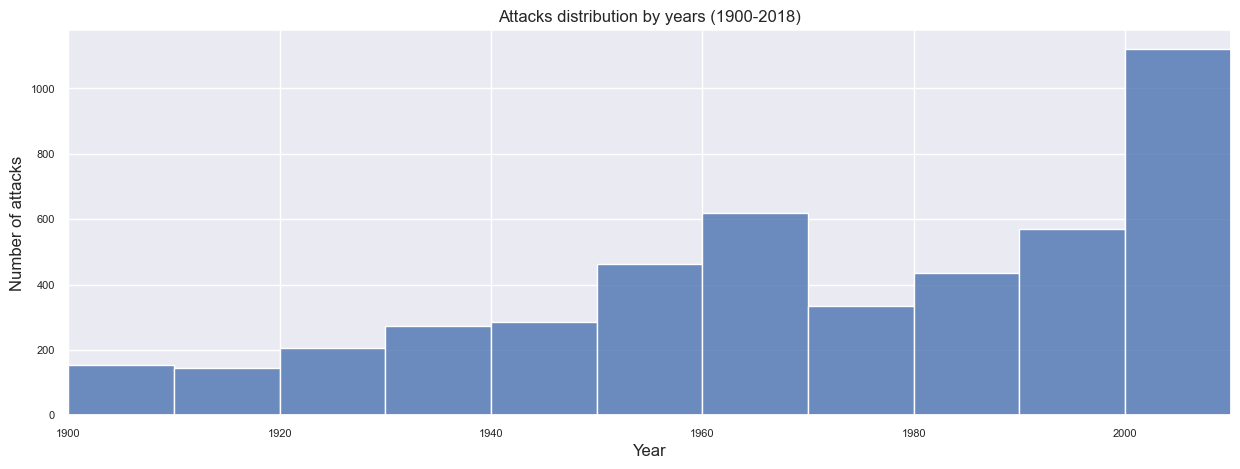

In [10]:
df_year = df_charts[df_charts.YEAR>1899]
plt.figure(figsize=(15,5), dpi=100)

sns.histplot(x=df_year.YEAR,alpha=0.8,bins=[i for i in range(1900, 2020, 10)])
plt.title('Attacks distribution by years (1900-2018)')
plt.ylabel('Number of attacks', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.margins(x=0)
plt.tick_params(axis='both', which='major', labelsize=8)
plt.savefig("../images/chart3.png")
plt.show()




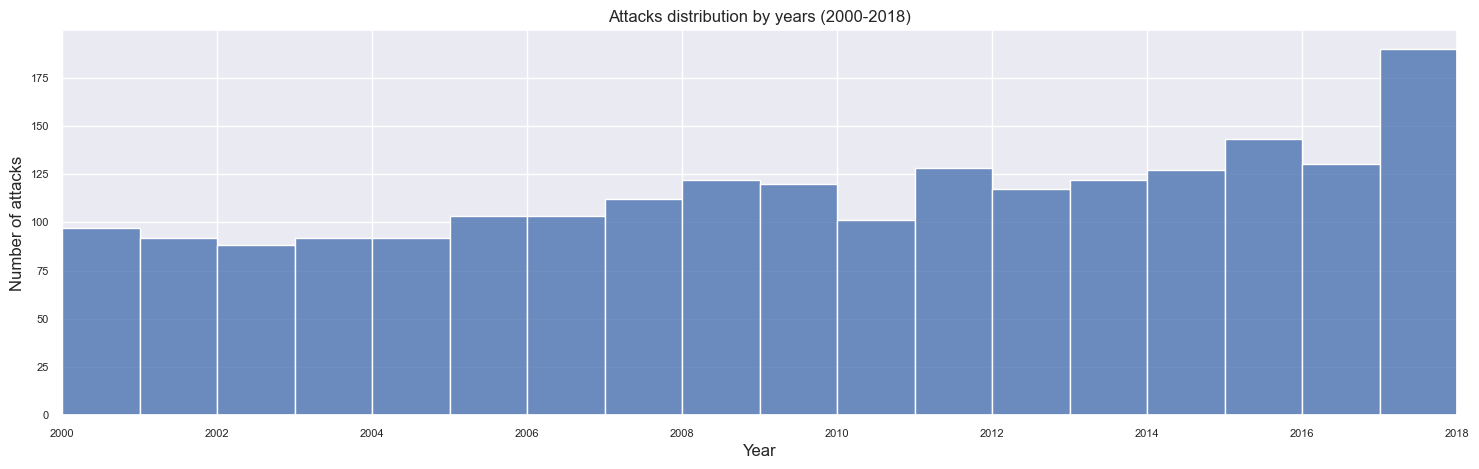

In [11]:
df_year = df_charts[df_charts.YEAR>1999]
plt.figure(figsize=(18,5), dpi=100)

sns.histplot(x=df_year.YEAR,alpha=0.8,bins=[2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018])
plt.title('Attacks distribution by years (2000-2018)')
plt.ylabel('Number of attacks', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.margins(x=0)
plt.tick_params(axis='both', which='major', labelsize=8)
plt.savefig("../images/chart3a.png")
plt.show()


### 4. Which type of activity is done when attack? Any activity more dangerous than others?


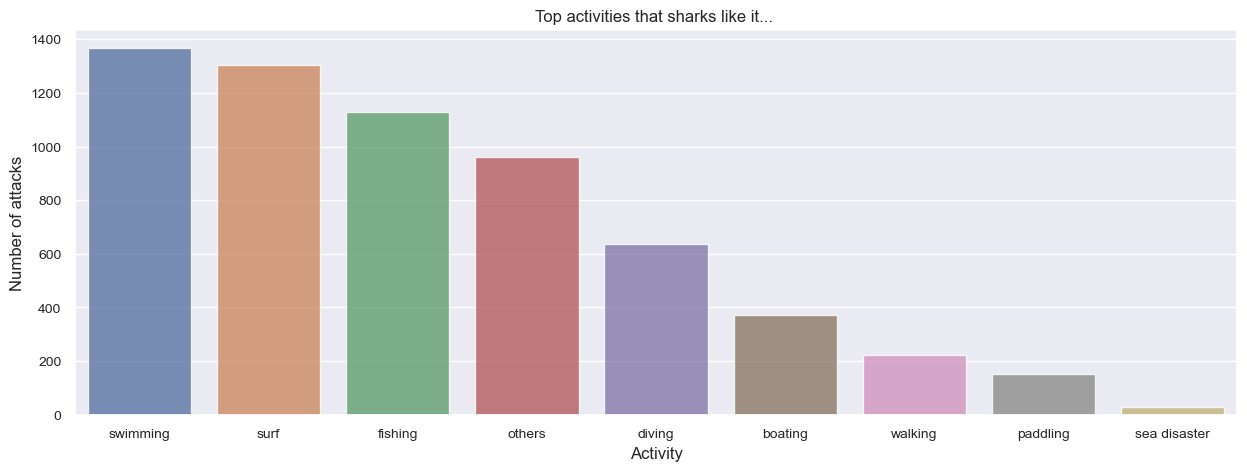

In [13]:
act_count  = df_charts['ACTIVITY'].value_counts()
act_count = act_count[:10,]
plt.figure(figsize=(15,5), dpi=100)
sns.barplot(x=act_count.index, y=act_count.values, alpha=0.8,)
plt.title('Top activities that sharks like it... ')
plt.ylabel('Number of attacks', fontsize=12)
plt.xlabel('Activity', fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.savefig("../images/chart4.png")
plt.show()



